In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Mounted at /content/drive


# TRX

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BA/Dataset/TRX-USD.csv',usecols=['Date','Close'])
df1 = df.reset_index()['Close']

<Axes: >

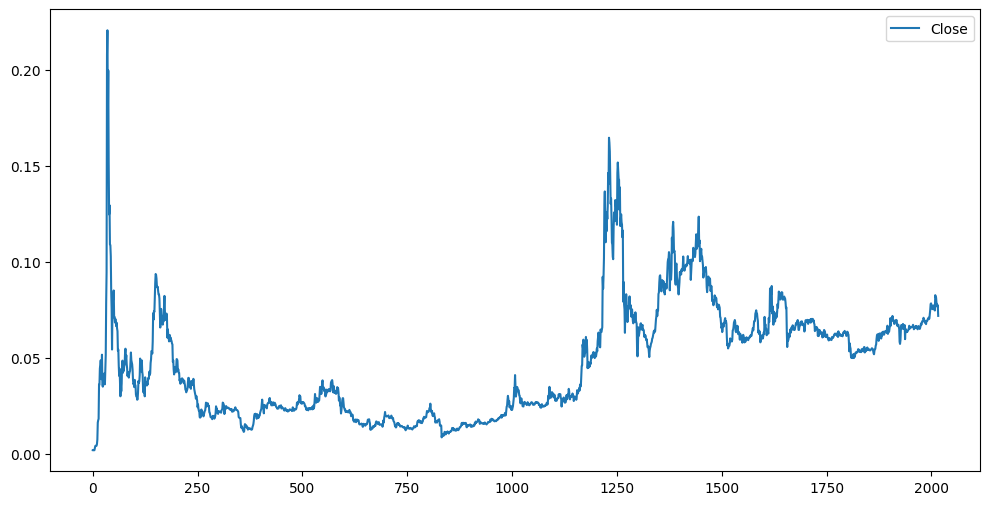

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
len(df1)

2017

## 7:2:1

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", yval.shape)

X_train shape: (1310, 100, 1)
y_train shape: (1310,)
X_test shape: (302, 100, 1)
y_test shape: (302,)
X_val shape: (102, 100, 1)
y_val shape: (102,)


In [ ]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 22ms/step - loss: 0.0117 - val_loss: 0.0016
Epoch 2/100
21/21 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 8.6793e-04
Epoch 3/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0012 - val_loss: 7.2077e-04
Epoch 4/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0010 - val_loss: 4.8495e-04
Epoch 5/100
21/21 [==============================] - 0s 13ms/step - loss: 8.8825e-04 - val_loss: 6.4618e-04
Epoch 6/100
21/21 [==============================] - 0s 13ms/step - loss: 8.1413e-04 - val_loss: 3.8627e-04
Epoch 7/100
21/21 [==============================] - 0s 15ms/step - loss: 7.0940e-04 - val_loss: 3.6895e-04
Epoch 8/100
21/21 [==============================] - 0s 13ms/step - loss: 6.4009e-04 - val_loss: 4.2315e-04
Epoch 9/100
21/21 [==============================] - 0s 14ms/step - loss: 5.9726e-04 - val_loss: 3.5207e-04
Epoch 10/100
21/21 [============================

In [ ]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 5ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('--------------------------')
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)
print('-------------------------')

---------VALIDATE----------
MAPE: 77.05420170878774
MAE: 0.23541570868581427
RMSE: 0.23657386141164963
--------------------------
---------TEST-------------
MAPE: 76.81238134299655
MAE: 0.223580231768863
RMSE: 0.22578465970473302
-------------------------


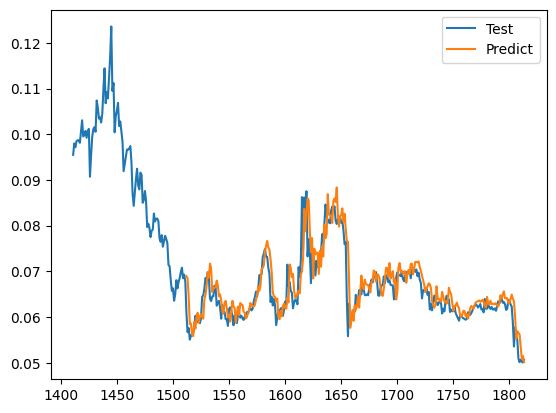

In [ ]:
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start = train_size + 101, stop = train_size + test_size, step=1)
plt.plot(test_data_index,(y_pred))

plt.legend(['Test','Predict'])
plt.show()

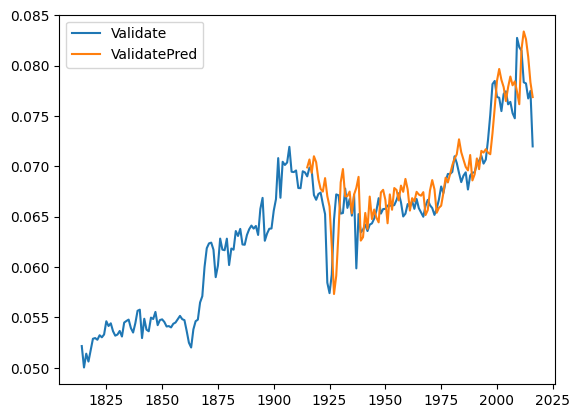

In [ ]:
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

plt.legend(['Validate','ValidatePred'])
plt.show()

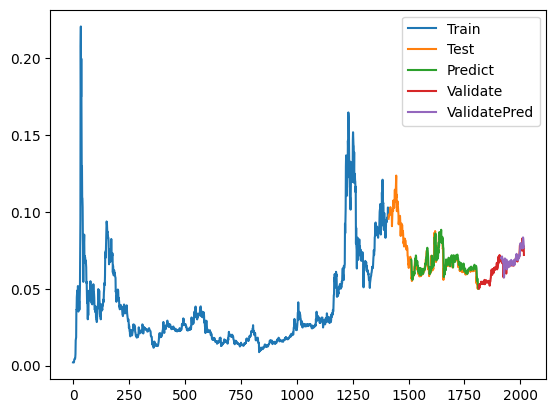

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [ ]:
val_data.shape

(203, 1)

In [ ]:
# Predict 7days
x_input=val_data[102:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.30930696 0.29790097 0.29572689 0.29834497 0.29900862 0.29379995
 0.28920919 0.2580716  0.2533115  0.26180189 0.28669181 0.29818019
 0.29778199 0.28945176 0.28969892 0.30081198 0.29203321 0.29611592
 0.28852719 0.29801084 0.26456185 0.28922294 0.2808927  0.28217428
 0.28443078 0.28151976 0.28442617 0.2850029  0.28719529 0.2908386
 0.29645005 0.28944719 0.29150228 0.29160299 0.2930951  0.29304473
 0.29311341 0.29329647 0.29558042 0.29871112 0.29457347 0.28813816
 0.28943348 0.29377706 0.29260076 0.29512271 0.29160756 0.2960839
 0.29190506 0.28990947 0.28802375 0.29293946 0.29569483 0.293237
 0.29196914 0.28885675 0.29165332 0.2958459  0.30176856 0.29874314
 0.30405709 0.30745326 0.30744869 0.30840528 0.3154951  0.31240103
 0.30789266 0.30375958 0.30669805 0.30819473 0.30040003 0.3067667
 0.30806658 0.30816271 0.312012   0.31346292 0.31571938 0.3121676
 0.31399384 0.32303349 0.33435709 0.34828956 0.3497222  0.34247674
 0.34208768 0.33602769 0.34380865 0.34499412 0.33909888 

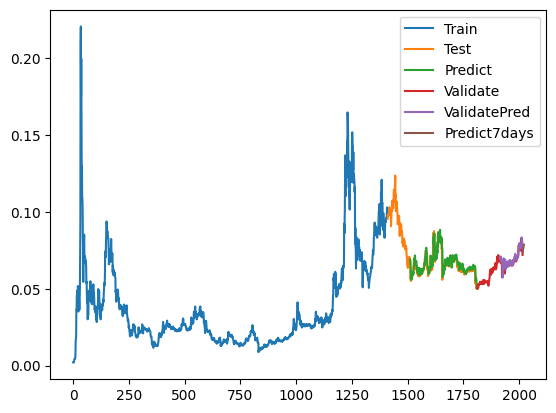

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+6, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict7days'])
plt.show()

## 5:3:2

In [ ]:
train_size1 = int(0.5 * len(df1))
test_size1 = int(0.3 * len(df1))
val_size1 = len(df1) - train_size1 - test_size1

train_data1 = df1[:train_size1]
test_data1 = df1[train_size1:train_size1 + test_size1]
val_data1 = df1[train_size1 + test_size1:]

In [ ]:
time_step = 100
X_train1, y_train1 = create_dataset(train_data1, time_step)
X_val1, yval1 = create_dataset(val_data1, time_step)
X_test1, ytest1 = create_dataset(test_data1, time_step)

In [ ]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1], 1)
X_val1 = X_val1.reshape(X_val1.shape[0],X_val1.shape[1], 1)

In [ ]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0047 - val_loss: 0.0199
Epoch 2/100
15/15 [==============================] - 0s 22ms/step - loss: 9.1806e-04 - val_loss: 0.0057
Epoch 3/100
15/15 [==============================] - 0s 24ms/step - loss: 3.7412e-04 - val_loss: 0.0027
Epoch 4/100
15/15 [==============================] - 0s 24ms/step - loss: 2.6919e-04 - val_loss: 0.0026
Epoch 5/100
15/15 [==============================] - 0s 25ms/step - loss: 2.2816e-04 - val_loss: 0.0027
Epoch 6/100
15/15 [==============================] - 0s 20ms/step - loss: 2.4926e-04 - val_loss: 0.0022
Epoch 7/100
15/15 [==============================] - 0s 14ms/step - loss: 1.8706e-04 - val_loss: 0.0018
Epoch 8/100
15/15 [==============================] - 0s 15ms/step - loss: 1.6548e-04 - val_loss: 0.0017
Epoch 9/100
15/15 [==============================] - 0s 15ms/step - loss: 1.5464e-04 - val_loss: 0.0016
Epoch 10/100
15/15 [==============================] - 0s 14ms/step -

In [ ]:
train_predict1 = model1.predict(X_train1)
y_pred1 = model1.predict(X_test1)
y_pred_val1 = model1.predict(X_val1)

10/10 [==============================] - 0s 4ms/step


In [ ]:
train_predict1 = scaler.inverse_transform(train_predict1)
y_pred1 = scaler.inverse_transform(y_pred1)
y_pred_val1 = scaler.inverse_transform(y_pred_val1)

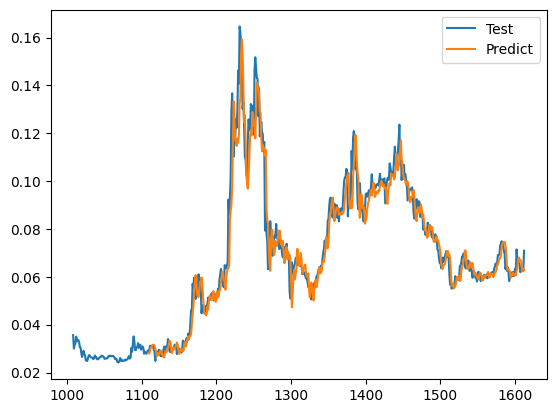

In [ ]:
test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))

test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

plt.legend(['Test','Predict'])
plt.show()

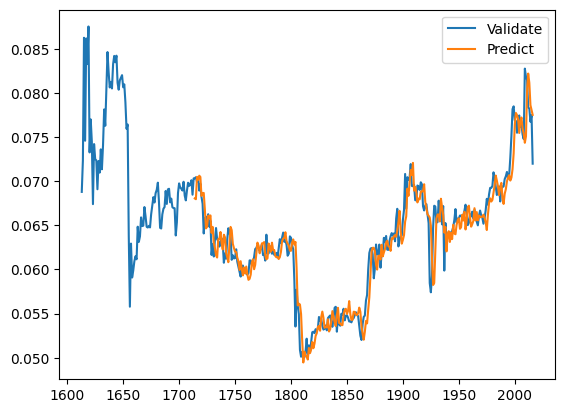

In [ ]:
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

plt.legend(['Validate','Predict'])
plt.show()

In [ ]:
print('---------VALIDATE----------')
valid_mape1 = np.mean(np.abs((yval1 - y_pred_val1) / yval1)) * 100
print('MAPE:', valid_mape1)

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')
test_mape1 = np.mean(np.abs((ytest1 - y_pred1) / ytest1)) * 100
print('MAPE:', test_mape1)

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAPE: 77.20080808843417
MAE: 0.21665201071897525
RMSE: 0.21880002765572198
--------------------------
---------TEST----------
MAPE: 73.83186597278865
MAE: 0.2583028995117708
RMSE: 0.2884049229459224
-------------------


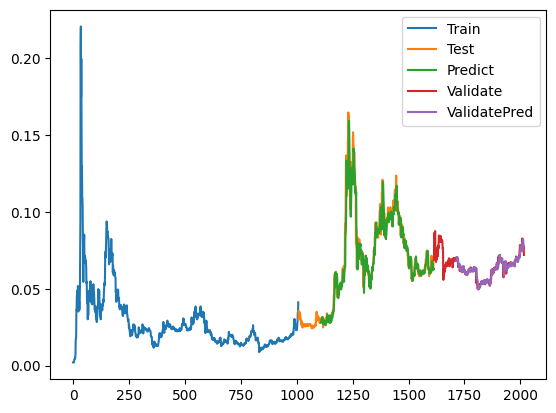

In [ ]:
train_data_index1 = pd.RangeIndex(start=0, stop=train_size1, step=1)
plt.plot(scaler.inverse_transform(train_data1))

test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))
test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [ ]:
val_data1.shape

(404, 1)

In [ ]:
x_input=val_data1[303:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps_1=100
i=0

while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps_1, 1))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps_1,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.30930696 0.29790097 0.29572689 0.29834497 0.29900862 0.29379995
 0.28920919 0.2580716  0.2533115  0.26180189 0.28669181 0.29818019
 0.29778199 0.28945176 0.28969892 0.30081198 0.29203321 0.29611592
 0.28852719 0.29801084 0.26456185 0.28922294 0.2808927  0.28217428
 0.28443078 0.28151976 0.28442617 0.2850029  0.28719529 0.2908386
 0.29645005 0.28944719 0.29150228 0.29160299 0.2930951  0.29304473
 0.29311341 0.29329647 0.29558042 0.29871112 0.29457347 0.28813816
 0.28943348 0.29377706 0.29260076 0.29512271 0.29160756 0.2960839
 0.29190506 0.28990947 0.28802375 0.29293946 0.29569483 0.293237
 0.29196914 0.28885675 0.29165332 0.2958459  0.30176856 0.29874314
 0.30405709 0.30745326 0.30744869 0.30840528 0.3154951  0.31240103
 0.30789266 0.30375958 0.30669805 0.30819473 0.30040003 0.3067667
 0.30806658 0.30816271 0.312012   0.31346292 0.31571938 0.3121676
 0.31399384 0.32303349 0.33435709 0.34828956 0.3497222  0.34247674
 0.34208768 0.33602769 0.34380865 0.34499412 0.33909888 

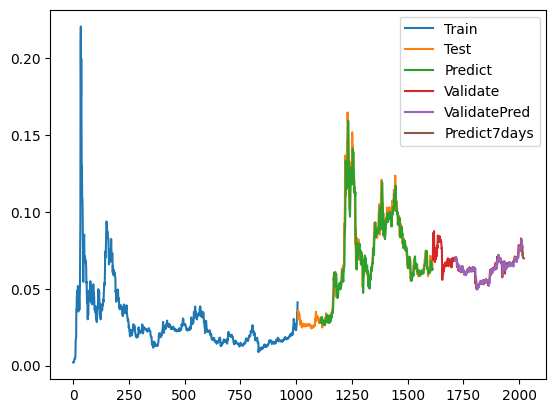

In [ ]:
train_data_index1 = pd.RangeIndex(start=0, stop=train_size1, step=1)
plt.plot(scaler.inverse_transform(train_data1))

test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))

test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+6, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict7days'])
plt.show()

## 6:2:2

In [ ]:
train_size2 = int(0.6 * len(df1))
test_size2 = int(0.2 * len(df1))
val_size2 = len(df1) - train_size2 - test_size2

train_data2 = df1[:train_size2]
test_data2 = df1[train_size2:train_size2 + test_size2]
val_data2 = df1[train_size2 + test_size2:]

In [ ]:
time_step = 100
X_train2, y_train2 = create_dataset(train_data2, time_step)
X_val2, yval2 = create_dataset(val_data2, time_step)
X_test2, ytest2 = create_dataset(test_data2, time_step)

In [ ]:
X_train2 = X_train2.reshape(X_train2.shape[0],X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0],X_test2.shape[1], 1)
X_val2 = X_val2.reshape(X_val2.shape[0],X_val2.shape[1], 1)

In [ ]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 0.0044 - val_loss: 0.0099
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 6.2499e-04 - val_loss: 0.0012
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 3.7202e-04 - val_loss: 0.0019
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 3.4003e-04 - val_loss: 9.5076e-04
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 2.7944e-04 - val_loss: 8.2537e-04
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 2.6192e-04 - val_loss: 0.0012
Epoch 7/100
18/18 [==============================] - 0s 14ms/step - loss: 2.6081e-04 - val_loss: 6.0881e-04
Epoch 8/100
18/18 [==============================] - 0s 14ms/step - loss: 2.1356e-04 - val_loss: 5.4384e-04
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 1.9494e-04 - val_loss: 6.6143e-04
Epoch 10/100
18/18 [============================

In [ ]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

10/10 [==============================] - 0s 3ms/step


In [ ]:
train_predict2 = scaler.inverse_transform(train_predict2)
y_pred2 = scaler.inverse_transform(y_pred2)
y_pred_val2 = scaler.inverse_transform(y_pred_val2)

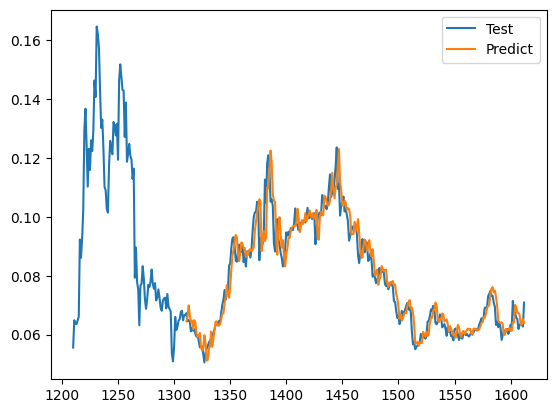

In [ ]:
test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))

test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

plt.legend(['Test','Predict'])
plt.show()

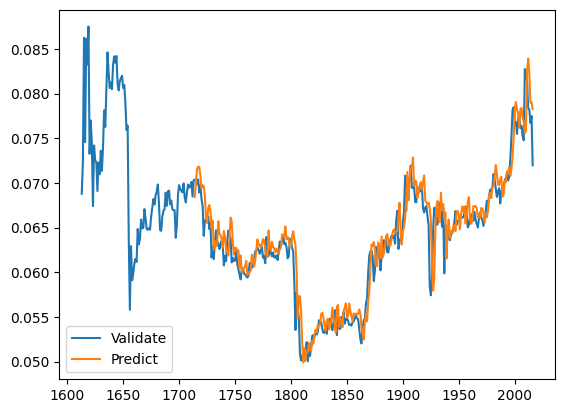

In [ ]:
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

plt.legend(['Validate','Predict'])
plt.show()

In [ ]:
print('---------VALIDATE----------')

valid_mape2 = np.mean(np.abs((yval2 - y_pred_val2) / yval2)) * 100
print('MAPE:', valid_mape2)

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mape2 = np.mean(np.abs((ytest2 - y_pred2) / ytest2)) * 100
print('MAPE:', test_mape2)

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAPE: 76.90415595950665
MAE: 0.2158318406760434
RMSE: 0.21799372937488756
--------------------------
---------TEST----------
MAPE: 76.18749693979045
MAE: 0.2706931843807799
RMSE: 0.2828196989345853
-------------------


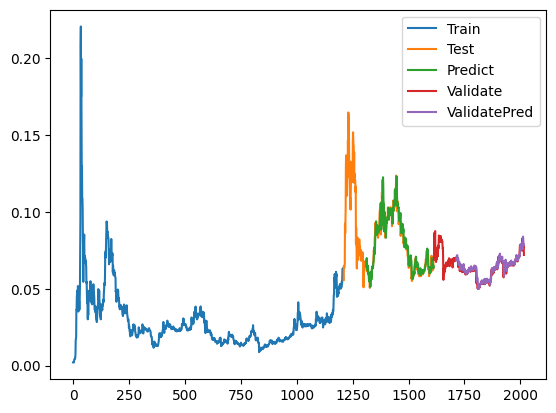

In [ ]:
train_data_index2 = pd.RangeIndex(start=0, stop=train_size2, step=1)
plt.plot(scaler.inverse_transform(train_data2))

test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))
test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [ ]:
val_data2.shape

(404, 1)

In [ ]:
# Predict 7 days
x_input=val_data2[303:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.30930696 0.29790097 0.29572689 0.29834497 0.29900862 0.29379995
 0.28920919 0.2580716  0.2533115  0.26180189 0.28669181 0.29818019
 0.29778199 0.28945176 0.28969892 0.30081198 0.29203321 0.29611592
 0.28852719 0.29801084 0.26456185 0.28922294 0.2808927  0.28217428
 0.28443078 0.28151976 0.28442617 0.2850029  0.28719529 0.2908386
 0.29645005 0.28944719 0.29150228 0.29160299 0.2930951  0.29304473
 0.29311341 0.29329647 0.29558042 0.29871112 0.29457347 0.28813816
 0.28943348 0.29377706 0.29260076 0.29512271 0.29160756 0.2960839
 0.29190506 0.28990947 0.28802375 0.29293946 0.29569483 0.293237
 0.29196914 0.28885675 0.29165332 0.2958459  0.30176856 0.29874314
 0.30405709 0.30745326 0.30744869 0.30840528 0.3154951  0.31240103
 0.30789266 0.30375958 0.30669805 0.30819473 0.30040003 0.3067667
 0.30806658 0.30816271 0.312012   0.31346292 0.31571938 0.3121676
 0.31399384 0.32303349 0.33435709 0.34828956 0.3497222  0.34247674
 0.34208768 0.33602769 0.34380865 0.34499412 0.33909888 

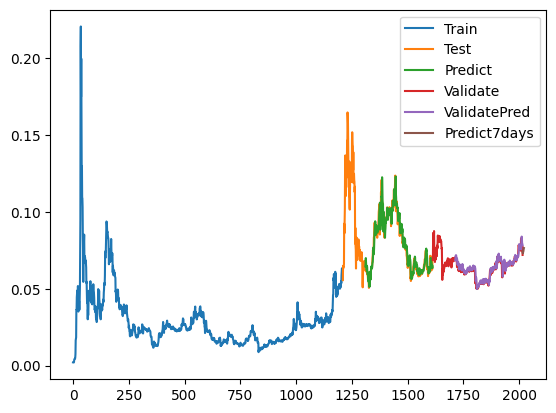

In [ ]:
train_data_index2 = pd.RangeIndex(start=0, stop=train_size2, step=1)
plt.plot(scaler.inverse_transform(train_data2))

test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))

test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+6, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict7days'])
plt.show()

# DOGE

In [2]:
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv',usecols=['Date','Close'])
df1 = df.reset_index()['Close']

<Axes: >

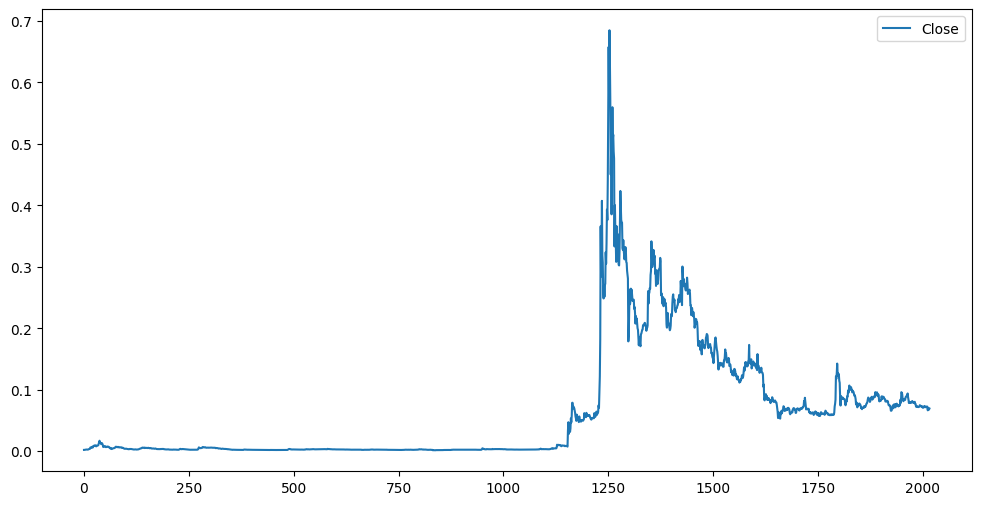

In [3]:
df.plot(figsize=(12,6))

In [4]:
len(df1)

2017

## 7:2:1

In [102]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [103]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [104]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [105]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [106]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [107]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [108]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 2s 35ms/step - loss: 0.0449 - val_loss: 0.0021
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 0.0036 - val_loss: 8.0581e-04
Epoch 3/100
21/21 [==============================] - 1s 25ms/step - loss: 0.0024 - val_loss: 5.1840e-04
Epoch 4/100
21/21 [==============================] - 1s 25ms/step - loss: 0.0022 - val_loss: 4.9476e-04
Epoch 5/100
21/21 [==============================] - 1s 24ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss: 0.0018 - val_loss: 4.1619e-04
Epoch 7/100
21/21 [==============================] - 1s 24ms/step - loss: 0.0016 - val_loss: 3.3391e-04
Epoch 8/100
21/21 [==============================] - 0s 23ms/step - loss: 0.0015 - val_loss: 4.7967e-04
Epoch 9/100
21/21 [==============================] - 1s 24ms/step - loss: 0.0014 - val_loss: 3.5633e-04
Epoch 10/100
21/21 [==============================] - 0s 23ms/step - los

In [110]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 8ms/step


In [111]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [112]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('--------------------------')
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)
print('-------------------------')

---------VALIDATE----------
MAPE: 14.451875572070122
MAE: 0.009947459961045667
RMSE: 0.0128880758555973
--------------------------
---------TEST-------------
MAPE: 44.07492738151218
MAE: 0.054073096405355445
RMSE: 0.07003380651273187
-------------------------


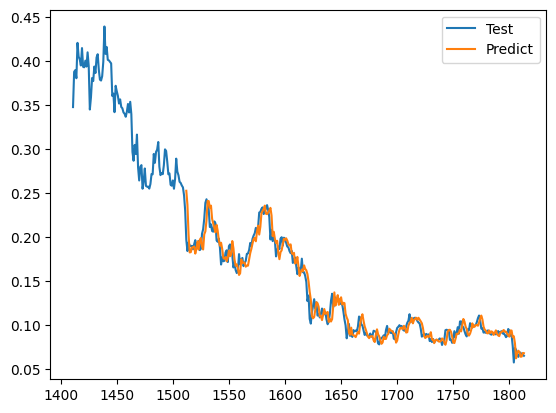

In [113]:
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start = train_size + 101, stop = train_size + test_size, step=1)
plt.plot(test_data_index,(y_pred))

plt.legend(['Test','Predict'])
plt.show()

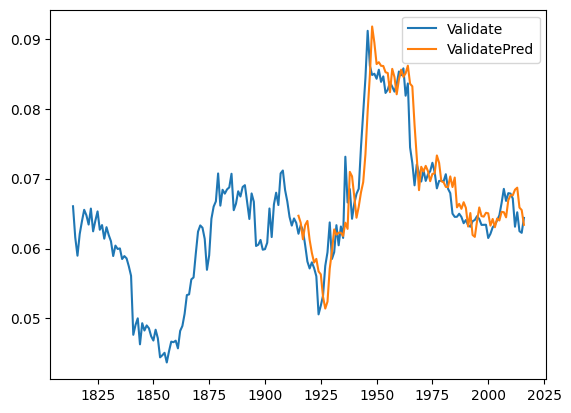

In [114]:
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

plt.legend(['Validate','ValidatePred'])
plt.show()

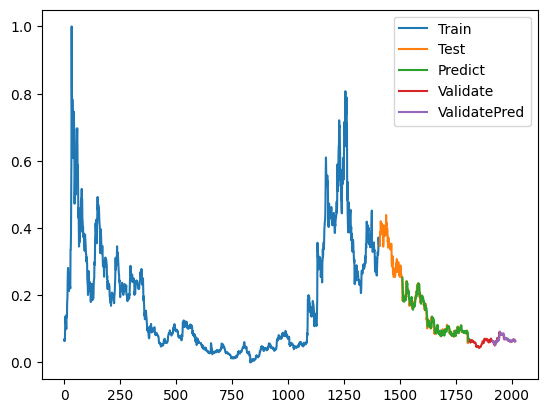

In [115]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [116]:
val_data.shape

(203, 1)

In [117]:
# Predict 7days
x_input=val_data[102:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.06260069 0.06047502 0.05814072 0.05715438 0.05802945 0.0572077
 0.05603707 0.05058613 0.05182514 0.05326234 0.05751832 0.05947478
 0.06374118 0.05851277 0.05947709 0.0633448  0.06046691 0.06315471
 0.06152047 0.07313749 0.06659125 0.06851062 0.06426043 0.06643363
 0.06782795 0.06856625 0.07449472 0.07933369 0.08441027 0.09115007
 0.08613723 0.08482404 0.08501181 0.08429205 0.08558669 0.08384466
 0.08463281 0.08226026 0.08272272 0.08378323 0.08315272 0.08244802
 0.0834587  0.08533055 0.08479623 0.08578373 0.08186735 0.08361633
 0.0744669  0.07223112 0.06904609 0.0720364  0.07085418 0.06958736
 0.07125174 0.06967776 0.07061311 0.07105818 0.07227168 0.07094112
 0.0686103  0.06966965 0.06971138 0.0695862  0.07063629 0.06855234
 0.0679253  0.06499642 0.06453512 0.0645444  0.06498019 0.06452122
 0.06362643 0.06407382 0.06333204 0.06312226 0.06390692 0.06409353
 0.06463132 0.06421871 0.06338304 0.06339927 0.06340622 0.06150888
 0.0621081  0.06303996 0.06339347 0.06404485 0.0647

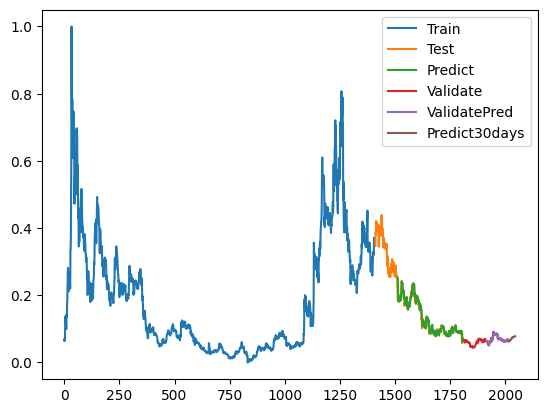

In [118]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## 5:3:2

In [119]:
train_size1 = int(0.5 * len(df1))
test_size1 = int(0.3 * len(df1))
val_size1 = len(df1) - train_size1 - test_size1

train_data1 = df1[:train_size1]
test_data1 = df1[train_size1:train_size1 + test_size1]
val_data1 = df1[train_size1 + test_size1:]

In [120]:
time_step = 100
X_train1, y_train1 = create_dataset(train_data1, time_step)
X_val1, yval1 = create_dataset(val_data1, time_step)
X_test1, ytest1 = create_dataset(test_data1, time_step)

In [121]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1], 1)
X_val1 = X_val1.reshape(X_val1.shape[0],X_val1.shape[1], 1)

In [122]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [123]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [124]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 2s 42ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 2/100
15/15 [==============================] - 0s 28ms/step - loss: 4.8301e-04 - val_loss: 0.0024
Epoch 3/100
15/15 [==============================] - 0s 27ms/step - loss: 3.2672e-04 - val_loss: 0.0027
Epoch 4/100
15/15 [==============================] - 0s 27ms/step - loss: 2.7909e-04 - val_loss: 0.0019
Epoch 5/100
15/15 [==============================] - 0s 26ms/step - loss: 2.5351e-04 - val_loss: 0.0019
Epoch 6/100
15/15 [==============================] - 0s 26ms/step - loss: 2.4062e-04 - val_loss: 0.0019
Epoch 7/100
15/15 [==============================] - 0s 28ms/step - loss: 2.2891e-04 - val_loss: 0.0017
Epoch 8/100
15/15 [==============================] - 1s 42ms/step - loss: 2.1170e-04 - val_loss: 0.0017
Epoch 9/100
15/15 [==============================] - 1s 46ms/step - loss: 2.0598e-04 - val_loss: 0.0015
Epoch 10/100
15/15 [==============================] - 1s 53ms/step -

In [125]:
train_predict1 = model1.predict(X_train1)
y_pred1 = model1.predict(X_test1)
y_pred_val1 = model1.predict(X_val1)

10/10 [==============================] - 0s 8ms/step


In [126]:
train_predict1 = scaler.inverse_transform(train_predict1)
y_pred1 = scaler.inverse_transform(y_pred1)
y_pred_val1 = scaler.inverse_transform(y_pred_val1)

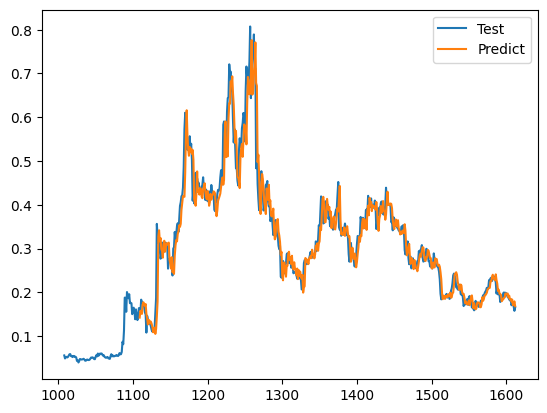

In [127]:
test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))

test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

plt.legend(['Test','Predict'])
plt.show()

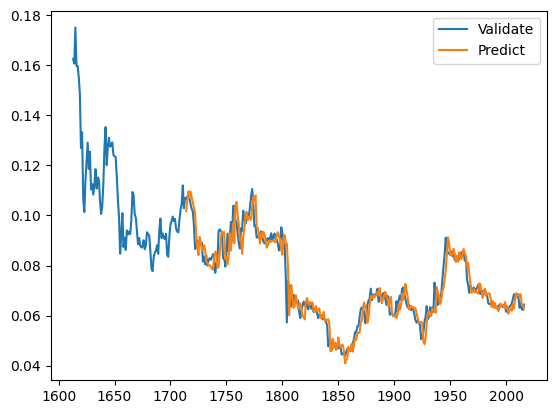

In [128]:
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

plt.legend(['Validate','Predict'])
plt.show()

In [129]:
print('---------VALIDATE----------')
valid_mape1 = np.mean(np.abs((yval1 - y_pred_val1) / yval1)) * 100
print('MAPE:', valid_mape1)

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')
test_mape1 = np.mean(np.abs((ytest1 - y_pred1) / ytest1)) * 100
print('MAPE:', test_mape1)

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAPE: 24.978378803036325
MAE: 0.017565518841194692
RMSE: 0.02209444072689602
--------------------------
---------TEST----------
MAPE: 48.58773285909868
MAE: 0.14247373783605197
RMSE: 0.18365838282095706
-------------------


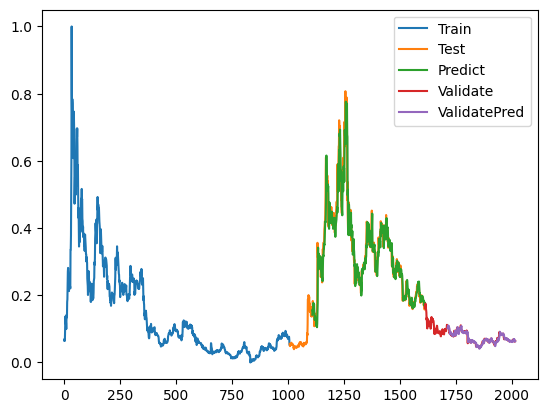

In [130]:
train_data_index1 = pd.RangeIndex(start=0, stop=train_size1, step=1)
plt.plot(scaler.inverse_transform(train_data1))

test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))
test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [131]:
val_data1.shape

(404, 1)

In [132]:
x_input=val_data1[303:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps_1=100
i=0

while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps_1, 1))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps_1,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.06260069 0.06047502 0.05814072 0.05715438 0.05802945 0.0572077
 0.05603707 0.05058613 0.05182514 0.05326234 0.05751832 0.05947478
 0.06374118 0.05851277 0.05947709 0.0633448  0.06046691 0.06315471
 0.06152047 0.07313749 0.06659125 0.06851062 0.06426043 0.06643363
 0.06782795 0.06856625 0.07449472 0.07933369 0.08441027 0.09115007
 0.08613723 0.08482404 0.08501181 0.08429205 0.08558669 0.08384466
 0.08463281 0.08226026 0.08272272 0.08378323 0.08315272 0.08244802
 0.0834587  0.08533055 0.08479623 0.08578373 0.08186735 0.08361633
 0.0744669  0.07223112 0.06904609 0.0720364  0.07085418 0.06958736
 0.07125174 0.06967776 0.07061311 0.07105818 0.07227168 0.07094112
 0.0686103  0.06966965 0.06971138 0.0695862  0.07063629 0.06855234
 0.0679253  0.06499642 0.06453512 0.0645444  0.06498019 0.06452122
 0.06362643 0.06407382 0.06333204 0.06312226 0.06390692 0.06409353
 0.06463132 0.06421871 0.06338304 0.06339927 0.06340622 0.06150888
 0.0621081  0.06303996 0.06339347 0.06404485 0.0647

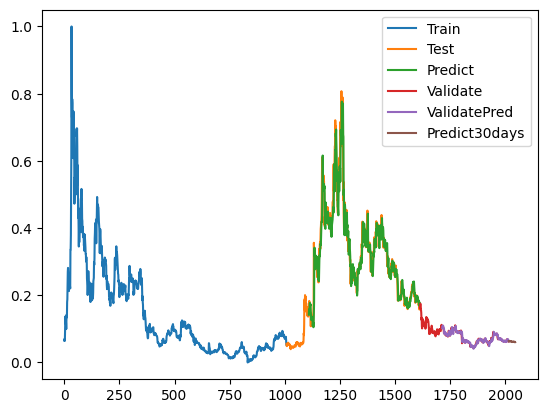

In [133]:
train_data_index1 = pd.RangeIndex(start=0, stop=train_size1, step=1)
plt.plot(scaler.inverse_transform(train_data1))

test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))

test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## 6:2:2

In [134]:
train_size2 = int(0.6 * len(df1))
test_size2 = int(0.2 * len(df1))
val_size2 = len(df1) - train_size2 - test_size2

train_data2 = df1[:train_size2]
test_data2 = df1[train_size2:train_size2 + test_size2]
val_data2 = df1[train_size2 + test_size2:]

In [135]:
time_step = 100
X_train2, y_train2 = create_dataset(train_data2, time_step)
X_val2, yval2 = create_dataset(val_data2, time_step)
X_test2, ytest2 = create_dataset(test_data2, time_step)

In [136]:
X_train2 = X_train2.reshape(X_train2.shape[0],X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0],X_test2.shape[1], 1)
X_val2 = X_val2.reshape(X_val2.shape[0],X_val2.shape[1], 1)

In [137]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [138]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [139]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 3s 79ms/step - loss: 0.0141 - val_loss: 0.0013
Epoch 2/100
18/18 [==============================] - 1s 42ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 0.0011 - val_loss: 8.8038e-04
Epoch 4/100
18/18 [==============================] - 1s 48ms/step - loss: 0.0010 - val_loss: 7.9690e-04
Epoch 5/100
18/18 [==============================] - 1s 43ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 8.7035e-04 - val_loss: 7.6019e-04
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 7.4854e-04 - val_loss: 6.9704e-04
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 7.4102e-04 - val_loss: 7.0934e-04
Epoch 9/100
18/18 [==============================] - 0s 24ms/step - loss: 6.6872e-04 - val_loss: 8.4561e-04
Epoch 10/100
18/18 [==============================] - 0s 25m

In [140]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

10/10 [==============================] - 0s 8ms/step


In [141]:
train_predict2 = scaler.inverse_transform(train_predict2)
y_pred2 = scaler.inverse_transform(y_pred2)
y_pred_val2 = scaler.inverse_transform(y_pred_val2)

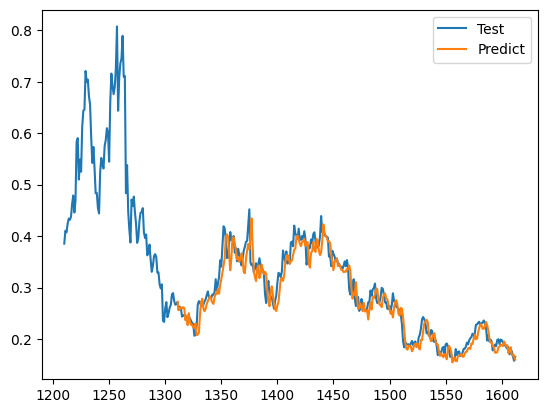

In [142]:
test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))

test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

plt.legend(['Test','Predict'])
plt.show()

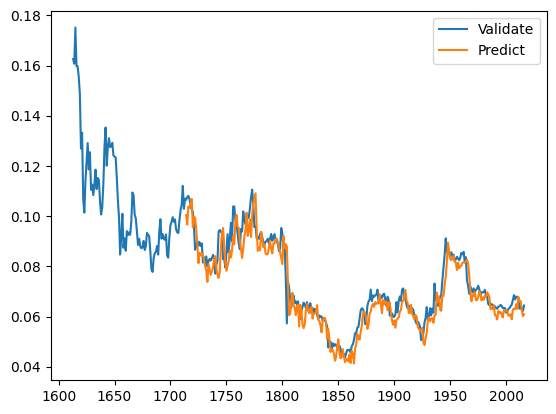

In [143]:
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

plt.legend(['Validate','Predict'])
plt.show()

In [144]:
print('---------VALIDATE----------')

valid_mape2 = np.mean(np.abs((yval2 - y_pred_val2) / yval2)) * 100
print('MAPE:', valid_mape2)

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mape2 = np.mean(np.abs((ytest2 - y_pred2) / ytest2)) * 100
print('MAPE:', test_mape2)

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAPE: 24.594070230018616
MAE: 0.017575240482241926
RMSE: 0.022044453917616294
--------------------------
---------TEST----------
MAPE: 33.09289824383364
MAE: 0.08711261418972098
RMSE: 0.10718173492943582
-------------------


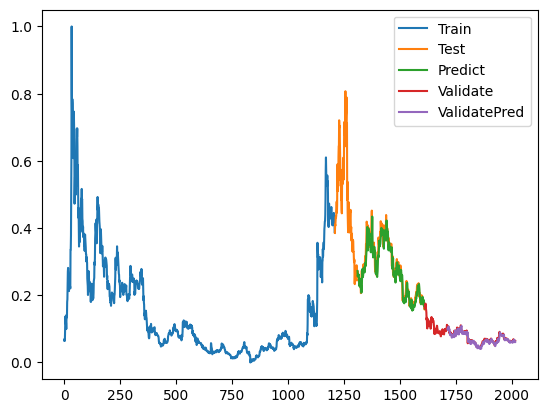

In [145]:
train_data_index2 = pd.RangeIndex(start=0, stop=train_size2, step=1)
plt.plot(scaler.inverse_transform(train_data2))

test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))
test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [146]:
val_data2.shape

(404, 1)

In [147]:
# Predict 7 days
x_input=val_data2[303:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.06260069 0.06047502 0.05814072 0.05715438 0.05802945 0.0572077
 0.05603707 0.05058613 0.05182514 0.05326234 0.05751832 0.05947478
 0.06374118 0.05851277 0.05947709 0.0633448  0.06046691 0.06315471
 0.06152047 0.07313749 0.06659125 0.06851062 0.06426043 0.06643363
 0.06782795 0.06856625 0.07449472 0.07933369 0.08441027 0.09115007
 0.08613723 0.08482404 0.08501181 0.08429205 0.08558669 0.08384466
 0.08463281 0.08226026 0.08272272 0.08378323 0.08315272 0.08244802
 0.0834587  0.08533055 0.08479623 0.08578373 0.08186735 0.08361633
 0.0744669  0.07223112 0.06904609 0.0720364  0.07085418 0.06958736
 0.07125174 0.06967776 0.07061311 0.07105818 0.07227168 0.07094112
 0.0686103  0.06966965 0.06971138 0.0695862  0.07063629 0.06855234
 0.0679253  0.06499642 0.06453512 0.0645444  0.06498019 0.06452122
 0.06362643 0.06407382 0.06333204 0.06312226 0.06390692 0.06409353
 0.06463132 0.06421871 0.06338304 0.06339927 0.06340622 0.06150888
 0.0621081  0.06303996 0.06339347 0.06404485 0.0647

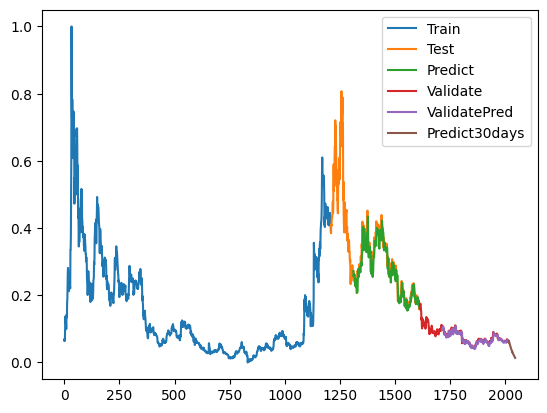

In [148]:
train_data_index2 = pd.RangeIndex(start=0, stop=train_size2, step=1)
plt.plot(scaler.inverse_transform(train_data2))

test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))

test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# XLM

In [149]:
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/XLM-USD.csv',usecols=['Date','Close'])
df1 = df.reset_index()['Close']

<Axes: >

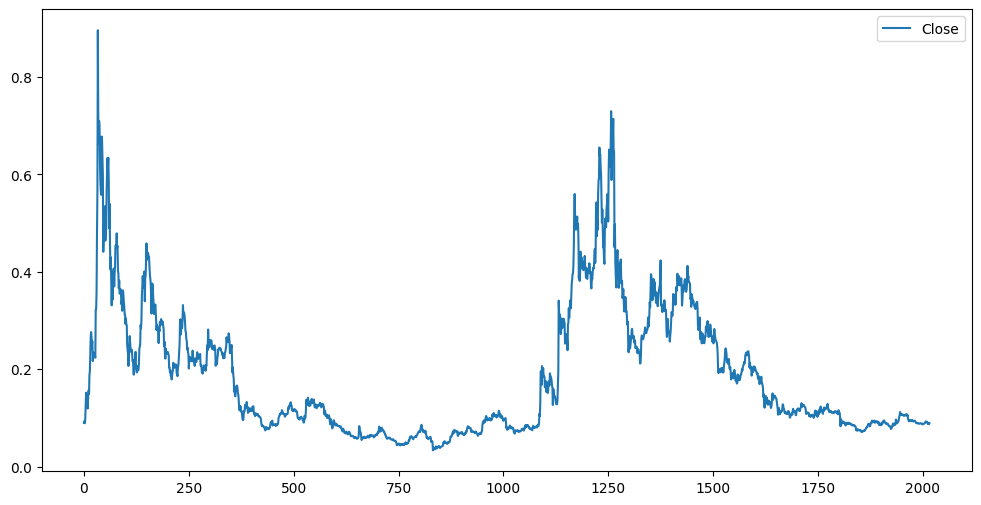

In [150]:
df.plot(figsize=(12,6))

In [151]:
len(df1)

2017

## 7:2:1

In [152]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [153]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [154]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [155]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [156]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [157]:
#Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [158]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 2s 35ms/step - loss: 0.0095 - val_loss: 3.5563e-04
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 0.0011 - val_loss: 2.0923e-04
Epoch 3/100
21/21 [==============================] - 1s 26ms/step - loss: 7.6309e-04 - val_loss: 1.5122e-04
Epoch 4/100
21/21 [==============================] - 0s 23ms/step - loss: 6.7131e-04 - val_loss: 1.4544e-04
Epoch 5/100
21/21 [==============================] - 1s 25ms/step - loss: 6.5786e-04 - val_loss: 1.6085e-04
Epoch 6/100
21/21 [==============================] - 1s 25ms/step - loss: 6.1392e-04 - val_loss: 1.3115e-04
Epoch 7/100
21/21 [==============================] - 1s 24ms/step - loss: 5.6885e-04 - val_loss: 1.4819e-04
Epoch 8/100
21/21 [==============================] - 1s 24ms/step - loss: 5.6072e-04 - val_loss: 1.2098e-04
Epoch 9/100
21/21 [==============================] - 1s 25ms/step - loss: 5.6191e-04 - val_loss: 2.8823e-04
Epoch 10/100
21/21 [================

In [160]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

4/4 [==============================] - 0s 8ms/step


In [161]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

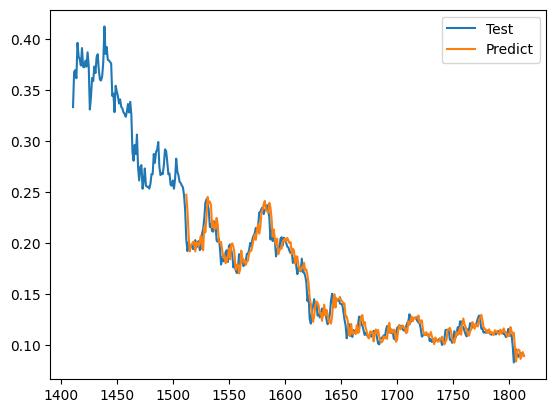

In [162]:
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start = train_size + 101, stop = train_size + test_size, step=1)
plt.plot(test_data_index,(y_pred))

plt.legend(['Test','Predict'])
plt.show()

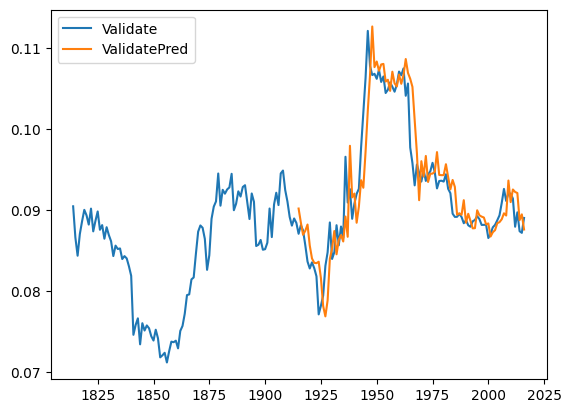

In [163]:
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

plt.legend(['Validate','ValidatePred'])
plt.show()

In [164]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('--------------------------')
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)
print('-------------------------')

---------VALIDATE----------
MAPE: 37.81148927094088
MAE: 0.024514877656280833
RMSE: 0.027201056971996634
--------------------------
---------TEST-------------
MAPE: 47.993342472532326
MAE: 0.05458274231828755
RMSE: 0.06772020895375899
-------------------------


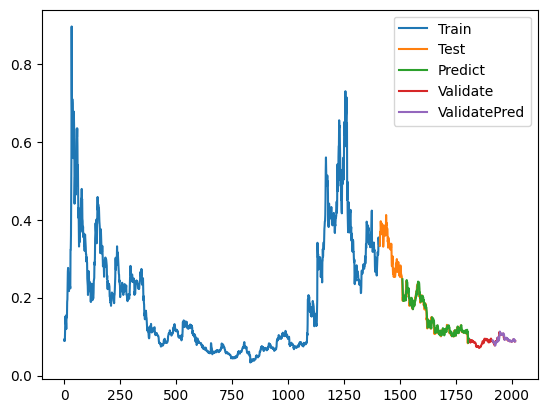

In [165]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [166]:
val_data.shape

(203, 1)

In [167]:
# Predict 7days
x_input=val_data[102:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.06260069 0.06047502 0.05814072 0.05715438 0.05802945 0.0572077
 0.05603707 0.05058613 0.05182514 0.05326234 0.05751832 0.05947478
 0.06374118 0.05851277 0.05947709 0.0633448  0.06046691 0.06315471
 0.06152047 0.07313749 0.06659125 0.06851062 0.06426043 0.06643363
 0.06782795 0.06856625 0.07449472 0.07933369 0.08441027 0.09115007
 0.08613723 0.08482404 0.08501181 0.08429205 0.08558669 0.08384466
 0.08463281 0.08226026 0.08272272 0.08378323 0.08315272 0.08244802
 0.0834587  0.08533055 0.08479623 0.08578373 0.08186735 0.08361633
 0.0744669  0.07223112 0.06904609 0.0720364  0.07085418 0.06958736
 0.07125174 0.06967776 0.07061311 0.07105818 0.07227168 0.07094112
 0.0686103  0.06966965 0.06971138 0.0695862  0.07063629 0.06855234
 0.0679253  0.06499642 0.06453512 0.0645444  0.06498019 0.06452122
 0.06362643 0.06407382 0.06333204 0.06312226 0.06390692 0.06409353
 0.06463132 0.06421871 0.06338304 0.06339927 0.06340622 0.06150888
 0.0621081  0.06303996 0.06339347 0.06404485 0.0647

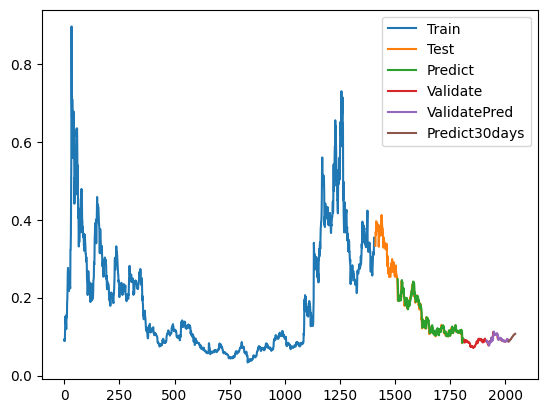

In [168]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## 5:3:2

In [169]:
train_size1 = int(0.5 * len(df1))
test_size1 = int(0.3 * len(df1))
val_size1 = len(df1) - train_size1 - test_size1

train_data1 = df1[:train_size1]
test_data1 = df1[train_size1:train_size1 + test_size1]
val_data1 = df1[train_size1 + test_size1:]

In [170]:
time_step = 100
X_train1, y_train1 = create_dataset(train_data1, time_step)
X_val1, yval1 = create_dataset(val_data1, time_step)
X_test1, ytest1 = create_dataset(test_data1, time_step)

In [171]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1], 1)
X_val1 = X_val1.reshape(X_val1.shape[0],X_val1.shape[1], 1)

In [172]:
#Define LSTM Model
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(time_step, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [173]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 50)                2600      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [174]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 2s 50ms/step - loss: 0.0038 - val_loss: 0.0103
Epoch 2/100
15/15 [==============================] - 0s 26ms/step - loss: 9.1817e-04 - val_loss: 0.0051
Epoch 3/100
15/15 [==============================] - 0s 26ms/step - loss: 6.5061e-04 - val_loss: 0.0041
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 5.3449e-04 - val_loss: 0.0038
Epoch 5/100
15/15 [==============================] - 0s 26ms/step - loss: 4.5769e-04 - val_loss: 0.0029
Epoch 6/100
15/15 [==============================] - 0s 28ms/step - loss: 4.1201e-04 - val_loss: 0.0025
Epoch 7/100
15/15 [==============================] - 0s 27ms/step - loss: 3.9314e-04 - val_loss: 0.0023
Epoch 8/100
15/15 [==============================] - 0s 32ms/step - loss: 3.5376e-04 - val_loss: 0.0024
Epoch 9/100
15/15 [==============================] - 0s 26ms/step - loss: 3.2225e-04 - val_loss: 0.0021
Epoch 10/100
15/15 [==============================] - 0s 27ms/step -

In [175]:
train_predict1 = model1.predict(X_train1)
y_pred1 = model1.predict(X_test1)
y_pred_val1 = model1.predict(X_val1)

10/10 [==============================] - 0s 9ms/step


In [176]:
train_predict1 = scaler.inverse_transform(train_predict1)
y_pred1 = scaler.inverse_transform(y_pred1)
y_pred_val1 = scaler.inverse_transform(y_pred_val1)

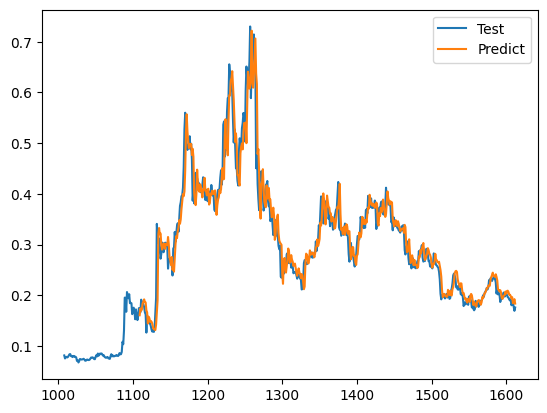

In [177]:
test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))

test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

plt.legend(['Test','Predict'])
plt.show()

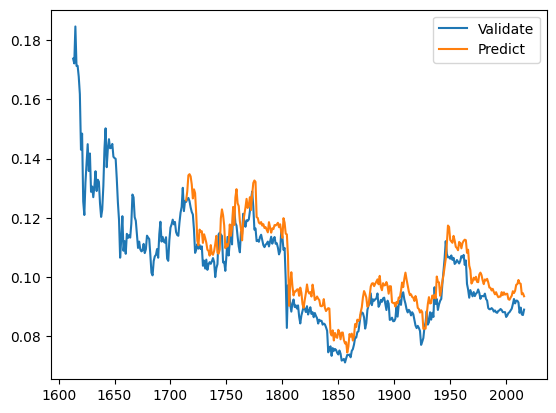

In [178]:
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

plt.legend(['Validate','Predict'])
plt.show()

In [179]:
print('---------VALIDATE----------')
valid_mape1 = np.mean(np.abs((yval1 - y_pred_val1) / yval1)) * 100
print('MAPE:', valid_mape1)

valid_mae1 = np.mean(np.abs(y_pred_val1 - yval1))
print('MAE:', valid_mae1)

valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - yval1)**2))
print('RMSE:', valid_rmse1)

print('--------------------------')
print('---------TEST----------')
test_mape1 = np.mean(np.abs((ytest1 - y_pred1) / ytest1)) * 100
print('MAPE:', test_mape1)

test_mae1 = np.mean(np.abs(y_pred1 - ytest1))
print('MAE:', test_mae1)

test_rmse1 = np.sqrt(np.mean((y_pred1 - ytest1)**2))
print('RMSE:', test_rmse1)

print('-------------------')

---------VALIDATE----------
MAPE: 48.119512331150446
MAE: 0.030591079122953033
RMSE: 0.035665986278640434
--------------------------
---------TEST----------
MAPE: 45.17348269925881
MAE: 0.13383551833010277
RMSE: 0.1728650854629087
-------------------


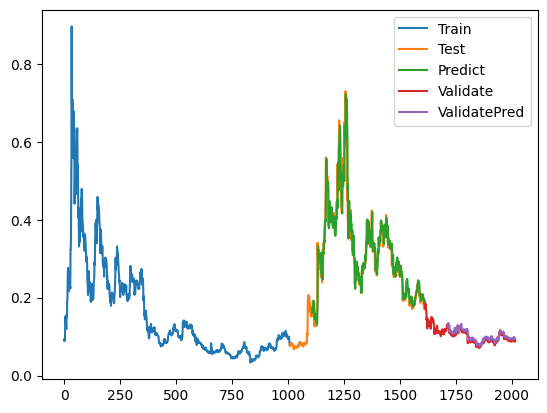

In [180]:
train_data_index1 = pd.RangeIndex(start=0, stop=train_size1, step=1)
plt.plot(scaler.inverse_transform(train_data1))

test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))
test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [181]:
val_data1.shape

(404, 1)

In [182]:
x_input=val_data1[303:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps_1=100
i=0

while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps_1, 1))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps_1,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.06260069 0.06047502 0.05814072 0.05715438 0.05802945 0.0572077
 0.05603707 0.05058613 0.05182514 0.05326234 0.05751832 0.05947478
 0.06374118 0.05851277 0.05947709 0.0633448  0.06046691 0.06315471
 0.06152047 0.07313749 0.06659125 0.06851062 0.06426043 0.06643363
 0.06782795 0.06856625 0.07449472 0.07933369 0.08441027 0.09115007
 0.08613723 0.08482404 0.08501181 0.08429205 0.08558669 0.08384466
 0.08463281 0.08226026 0.08272272 0.08378323 0.08315272 0.08244802
 0.0834587  0.08533055 0.08479623 0.08578373 0.08186735 0.08361633
 0.0744669  0.07223112 0.06904609 0.0720364  0.07085418 0.06958736
 0.07125174 0.06967776 0.07061311 0.07105818 0.07227168 0.07094112
 0.0686103  0.06966965 0.06971138 0.0695862  0.07063629 0.06855234
 0.0679253  0.06499642 0.06453512 0.0645444  0.06498019 0.06452122
 0.06362643 0.06407382 0.06333204 0.06312226 0.06390692 0.06409353
 0.06463132 0.06421871 0.06338304 0.06339927 0.06340622 0.06150888
 0.0621081  0.06303996 0.06339347 0.06404485 0.0647

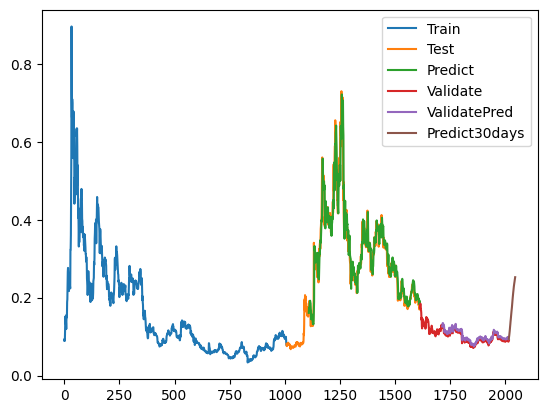

In [183]:
train_data_index1 = pd.RangeIndex(start=0, stop=train_size1, step=1)
plt.plot(scaler.inverse_transform(train_data1))

test_data_index1 = pd.RangeIndex(start=train_size1, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,scaler.inverse_transform(test_data1))

test_data_index1 = pd.RangeIndex(start=train_size1+101, stop=train_size1+test_size1, step=1)
plt.plot(test_data_index1,(y_pred1))

val_data_index1 = pd.RangeIndex(start=train_size1+test_size1, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,scaler.inverse_transform(val_data1))
val_data_index1 = pd.RangeIndex(start=train_size1+test_size1+101, stop=train_size1+test_size1+val_size1, step=1)
plt.plot(val_data_index1,y_pred_val1)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## 6:2:2

In [184]:
train_size2 = int(0.6 * len(df1))
test_size2 = int(0.2 * len(df1))
val_size2 = len(df1) - train_size2 - test_size2

train_data2 = df1[:train_size2]
test_data2 = df1[train_size2:train_size2 + test_size2]
val_data2 = df1[train_size2 + test_size2:]

In [185]:
time_step = 100
X_train2, y_train2 = create_dataset(train_data2, time_step)
X_val2, yval2 = create_dataset(val_data2, time_step)
X_test2, ytest2 = create_dataset(test_data2, time_step)

In [186]:
X_train2 = X_train2.reshape(X_train2.shape[0],X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0],X_test2.shape[1], 1)
X_val2 = X_val2.reshape(X_val2.shape[0],X_val2.shape[1], 1)

In [187]:
#Define LSTM Model
model2 = Sequential()
model2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

In [188]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 50)                2600      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [189]:
model2.fit(X_train2,y_train2,validation_data=(X_test2,ytest2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 3s 66ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 2/100
18/18 [==============================] - 1s 45ms/step - loss: 0.0011 - val_loss: 7.9553e-04
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 7.9748e-04 - val_loss: 7.0409e-04
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 6.7401e-04 - val_loss: 6.1918e-04
Epoch 5/100
18/18 [==============================] - 1s 29ms/step - loss: 5.8415e-04 - val_loss: 5.3080e-04
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 5.2193e-04 - val_loss: 4.6171e-04
Epoch 7/100
18/18 [==============================] - 0s 26ms/step - loss: 4.7791e-04 - val_loss: 5.5097e-04
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 4.2784e-04 - val_loss: 4.1140e-04
Epoch 9/100
18/18 [==============================] - 0s 25ms/step - loss: 3.8106e-04 - val_loss: 4.7814e-04
Epoch 10/100
18/18 [====================

In [190]:
train_predict2 = model2.predict(X_train2)
y_pred2 = model2.predict(X_test2)
y_pred_val2 = model2.predict(X_val2)

10/10 [==============================] - 0s 18ms/step


In [191]:
train_predict2 = scaler.inverse_transform(train_predict2)
y_pred2 = scaler.inverse_transform(y_pred2)
y_pred_val2 = scaler.inverse_transform(y_pred_val2)

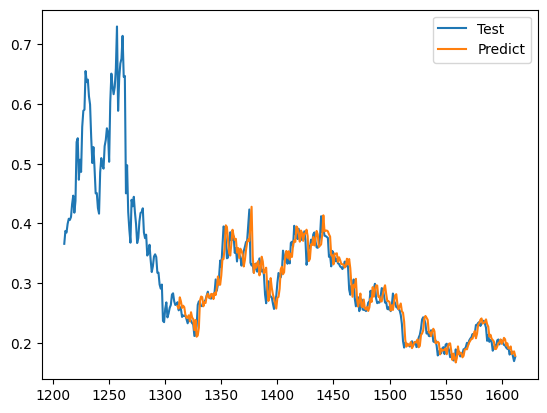

In [192]:
test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))

test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

plt.legend(['Test','Predict'])
plt.show()

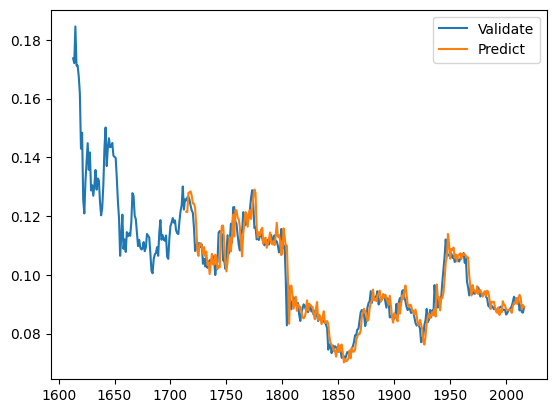

In [193]:
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

plt.legend(['Validate','Predict'])
plt.show()

In [194]:
print('---------VALIDATE----------')

valid_mape2 = np.mean(np.abs((yval2 - y_pred_val2) / yval2)) * 100
print('MAPE:', valid_mape2)

valid_mae2 = np.mean(np.abs(y_pred_val2 - yval2))
print('MAE:', valid_mae2)

valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - yval2)**2))
print('RMSE:', valid_rmse2)

print('--------------------------')
print('---------TEST----------')

test_mape2 = np.mean(np.abs((ytest2 - y_pred2) / ytest2)) * 100
print('MAPE:', test_mape2)

test_mae2 = np.mean(np.abs(y_pred2 - ytest2))
print('MAE:', test_mae2)

test_rmse2 = np.sqrt(np.mean((y_pred2 - ytest2)**2))
print('RMSE:', test_rmse2)

print('-------------------')

---------VALIDATE----------
MAPE: 41.83800178540633
MAE: 0.026574409652830807
RMSE: 0.03166229508189007
--------------------------
---------TEST----------
MAPE: 31.720551173777856
MAE: 0.08271781921903372
RMSE: 0.10158968225197726
-------------------


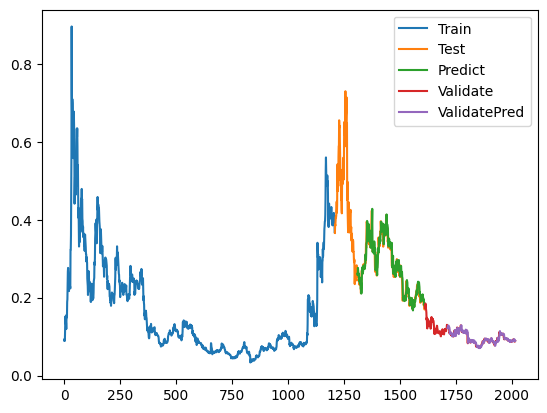

In [195]:
train_data_index2 = pd.RangeIndex(start=0, stop=train_size2, step=1)
plt.plot(scaler.inverse_transform(train_data2))

test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))
test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()

In [196]:
val_data2.shape

(404, 1)

In [197]:
# Predict 7 days
x_input=val_data2[303:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.06260069 0.06047502 0.05814072 0.05715438 0.05802945 0.0572077
 0.05603707 0.05058613 0.05182514 0.05326234 0.05751832 0.05947478
 0.06374118 0.05851277 0.05947709 0.0633448  0.06046691 0.06315471
 0.06152047 0.07313749 0.06659125 0.06851062 0.06426043 0.06643363
 0.06782795 0.06856625 0.07449472 0.07933369 0.08441027 0.09115007
 0.08613723 0.08482404 0.08501181 0.08429205 0.08558669 0.08384466
 0.08463281 0.08226026 0.08272272 0.08378323 0.08315272 0.08244802
 0.0834587  0.08533055 0.08479623 0.08578373 0.08186735 0.08361633
 0.0744669  0.07223112 0.06904609 0.0720364  0.07085418 0.06958736
 0.07125174 0.06967776 0.07061311 0.07105818 0.07227168 0.07094112
 0.0686103  0.06966965 0.06971138 0.0695862  0.07063629 0.06855234
 0.0679253  0.06499642 0.06453512 0.0645444  0.06498019 0.06452122
 0.06362643 0.06407382 0.06333204 0.06312226 0.06390692 0.06409353
 0.06463132 0.06421871 0.06338304 0.06339927 0.06340622 0.06150888
 0.0621081  0.06303996 0.06339347 0.06404485 0.0647

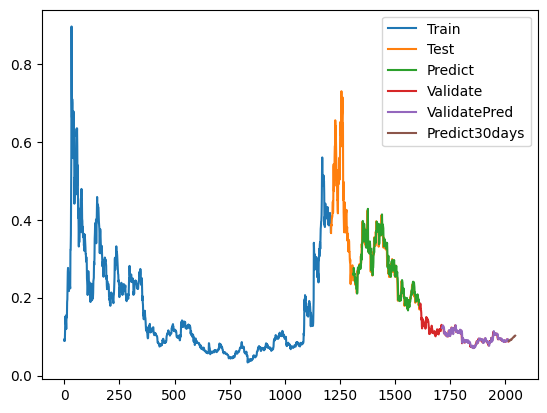

In [198]:
train_data_index2 = pd.RangeIndex(start=0, stop=train_size2, step=1)
plt.plot(scaler.inverse_transform(train_data2))

test_data_index2 = pd.RangeIndex(start=train_size2, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,scaler.inverse_transform(test_data2))

test_data_index2 = pd.RangeIndex(start=train_size2+101, stop=train_size2+test_size2, step=1)
plt.plot(test_data_index2,(y_pred2))

val_data_index2 = pd.RangeIndex(start=train_size2+test_size2, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,scaler.inverse_transform(val_data2))
val_data_index2 = pd.RangeIndex(start=train_size2+test_size2+101, stop=train_size2+test_size2+val_size2, step=1)
plt.plot(val_data_index2,y_pred_val2)

prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()